# EDA & MODEL Helper2

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


전처리 과정 끝난 VERSION
--

In [103]:
# 구글 공유 드라이브에 전처리가 완료된 파일

import pandas as pd
seoul=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/seoul.csv')
GyeongBokGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/GyeongBokGung.csv')
NationalMuseumOfKorea=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/NationalMuseumOfKorea.csv')
NamSanGolHanOkVillage=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/NamSanGolHanOkVillage.csv')
DuckSooGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/DuckSooGung.csv')
SeoDaeMunNaturalHistoryMuseum=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SeoDaeMunNaturalHistoryMuseum.csv')
SeoDaeMunPrisonHistoryMuseum=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SeoDaeMunPrisonHistoryMuseum.csv')
SeoulMuseumOfArt=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SeoulMuseumOfArt.csv')
SunReungJungReung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SunReungJungReung.csv')
JongMyo=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/JongMyo.csv')
ChangGyeongGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/ChangGyeongGung.csv')
ChangDeokGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/ChangDeokGung.csv')
TaeReungGangNeung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/TaeReungGangNeung.csv')
TrickEyeMuseum=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/TrickEyeMuseum.csv')
HeonLeungInReung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/HeonLeungInReung.csv')

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install catboost

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgbm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import catboost as cb

In [5]:
# 원래는 기온, 습도으로 해주어야 하나, 여기서는 평균 기온과 평균 습도로 열지수의 평균을 구해주도록 하겠다.
seoul['열지수']=0
i=0

for i in range(0,108):
    Tc=seoul.loc[i, '평균 기온(°C)']
    T=(Tc*1.8)+32
    R=seoul.loc[i, '평균 상대습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    seoul['열지수'][i]=Heat_index
    i+=1

In [6]:
today=seoul.iloc[-1:, :]
today

,Unnamed: 0,date,year,month,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,월별합계,열지수
107,107,201912,2019,12,1.416129,-2.603226,1100.548387,5.274194,1325.806452,3.973158,1.189474,7.587097,231.935484,1210.709677,4.4,222.903226,1095.322581,2.125806,1840.193548,182.903226,-6.53871,37.129032,1170.354839,57.754839,4.203226,1014.948387,1028.96129,1101.709677,1022.548387,1176.258065,1025.777419,9.641935,5.296774,1193.548387,1.375806,7.201613,4.416129,3.441935,1.609677,-6.470968,2.474194,3.274194,4.145161,5.035484,5.819355,9.025806,11.845161,16.735484,17.516129,1.690323,1.25,239734,34711,24830,53852,68460,112314,97041,268274,1754,17542,53841,4146.0,3415,13513.0,993427,21


- 마지막 최종 실험 시 사용할 데이터 입니다.

- 2019년 12월 기후 데이터와 관광데이터

전처리 과정 안 끝난 버전
--

In [7]:
# 처음에 내가 만든 14개의 데이터 프레임

b_GyeongBokGung=pd.read_csv('/content/drive/MyDrive/경복궁.csv')
b_NationalMuseumOfKorea=pd.read_csv('/content/drive/MyDrive/국립중앙박물관.csv')
b_NamSanGolHanOkVillage=pd.read_csv('/content/drive/MyDrive/남산골한옥마을.csv')
b_DuckSooGung=pd.read_csv('/content/drive/MyDrive/덕수궁.csv')
b_SeoDaeMunNaturalHistoryMuseum=pd.read_csv('/content/drive/MyDrive/서대문자연사박물관.csv')
b_SeoDaeMunPrisonHistoryMuseum=pd.read_csv('/content/drive/MyDrive/서대문형무소역사관.csv')
b_SeoulMuseumOfArt=pd.read_csv('/content/drive/MyDrive/서울시립미술관.csv')
b_SunReungJungReung=pd.read_csv('/content/drive/MyDrive/선릉정릉.csv')
b_JongMyo=pd.read_csv('/content/drive/MyDrive/종묘.csv')
b_ChangGyeongGung=pd.read_csv('/content/drive/MyDrive/창경궁.csv')
b_ChangDeokGung=pd.read_csv('/content/drive/MyDrive/창덕궁.csv')
b_TaeReungGangNeung=pd.read_csv('/content/drive/MyDrive/태릉강릉조선왕릉전시관.csv')
b_TrickEyeMuseum=pd.read_csv('/content/drive/MyDrive/트릭아이미술관.csv')
b_HeonLeungInReung=pd.read_csv('/content/drive/MyDrive/헌릉인릉.csv')

In [8]:
b_GyeongBokGung=b_GyeongBokGung.iloc[:, 1:]
b_NationalMuseumOfKorea=b_NationalMuseumOfKorea.iloc[:, 1:]
b_NamSanGolHanOkVillage=b_NamSanGolHanOkVillage.iloc[:, 1:]
b_DuckSooGung=b_DuckSooGung.iloc[:, 1:]
b_SeoDaeMunNaturalHistoryMuseum=b_SeoDaeMunNaturalHistoryMuseum.iloc[:, 1:]
b_SeoDaeMunPrisonHistoryMuseum=b_SeoDaeMunPrisonHistoryMuseum.iloc[:, 1:]
b_SeoulMuseumOfArt=b_SeoulMuseumOfArt.iloc[:, 1:]
b_SunReungJungReung=b_SunReungJungReung.iloc[:, 1:]
b_JongMyo=b_JongMyo.iloc[:, 1:]
b_ChangGyeongGung=b_ChangGyeongGung.iloc[:, 1:]
b_ChangDeokGung=b_ChangDeokGung.iloc[:, 1:]
b_TaeReungGangNeung=b_TaeReungGangNeung.iloc[:, 1:]
b_TrickEyeMuseum=b_TrickEyeMuseum.iloc[:, 1:]
b_HeonLeungInReung=b_HeonLeungInReung.iloc[:, 1:]

#Grid Search CV

In [51]:
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[1,10,100], 'min_child_weight':[4,5]},
           {'bootstrap':[False],'learning_rate':[0.1,0.05,0.01],'max_depth':[1,5,10],
           'sub_sample':[0.5,0.7,1.0]}, {'colsample_bytree':[i/10.0 for i in range(6,11)]}]

In [70]:
import xgboost as xgb

xgboost
--

In [147]:
def make_df(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

def best_params(df):
    df=df
    x_train=make_df(df)[0]
    x_test=make_df(df)[1]
    y_train=make_df(df)[2]
    y_test=make_df(df)[3]
    xgb_ = xgb.XGBRegressor(random_state=42, bootstrap=False)
    grid_search=GridSearchCV(xgb_, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score= True) 
    grid_search.fit(x_train, y_train)
    best_params=grid_search.best_params_
    return best_params

In [155]:
def xgboost_result(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    xgb_=xgb.XGBRegressor(random_state=42, colsample_bytree=0.9)
    xgb_.fit(x_train, y_train)
    y_pred=xgb_.predict(x_test)
    train_score=xgb_.score(x_train, y_train)
    test_score=xgb_.score(x_test, y_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    return rmse, train_score, test_score

lightgbm
--

In [122]:
import lightgbm as lgbm

In [149]:
def make_df(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

def lgbm_best_params(df):
    df=df
    x_train=make_df(df)[0]
    x_test=make_df(df)[1]
    y_train=make_df(df)[2]
    y_test=make_df(df)[3]
    lgbm_ = lgbm.LGBMRegressor(random_state=42, bootstrap=False)
    grid_search=GridSearchCV(lgbm_, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score= True) 
    grid_search.fit(x_train, y_train)
    best_params=grid_search.best_params_
    return best_params

In [152]:
def lgbm_result(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    lgbm_ = lgbm.LGBMRegressor(random_state=42, colsample_bytree=0.6)
    lgbm_.fit(x_train, y_train)
    y_pred=lgbm_.predict(x_test)
    train_score=lgbm_.score(x_train, y_train)
    test_score=lgbm_.score(x_test, y_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    return rmse, train_score, test_score

GyeongBokGung(xgboost)
--

In [ ]:
best_params(b_GyeongBokGung)

{'colsample_bytree': 0.6}

before:

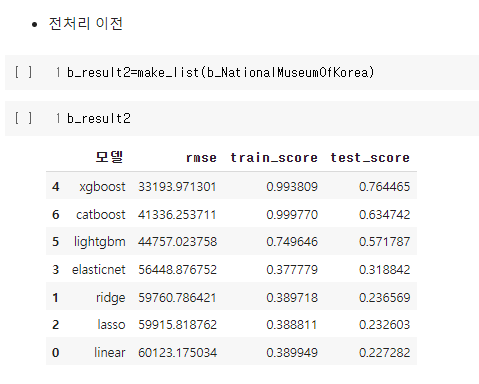

In [127]:
xgboost_result(b_GyeongBokGung)

[04:53:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(93611.25130742574, 0.9964648961108874, 0.6671780586565159)

NationalMuseumOfKorea(xgboost)
--

In [ ]:
best_params(b_NationalMuseumOfKorea)

{'min_child_weight': 5, 'n_estimators': 100}

before:

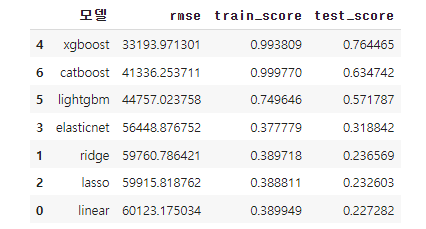

In [129]:
xgboost_result(b_NationalMuseumOfKorea)

[04:53:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(40298.53438868602, 0.9859978005162316, 0.6528513283609133)

NamSanGolHanOkVillage(xgboost)
--

In [ ]:
best_params(b_NamSanGolHanOkVillage)

{'colsample_bytree': 0.6}

before:

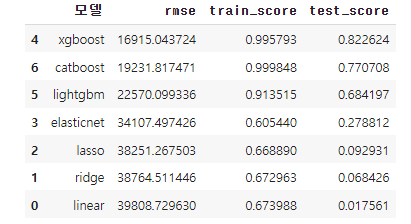

In [131]:
xgboost_result(b_NamSanGolHanOkVillage)

[04:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(19313.668172932354, 0.9968815092953296, 0.7687517872229439)

DuckSooGung(xgboost)
--

In [ ]:
best_params(b_DuckSooGung)

{'colsample_bytree': 0.6}

before:

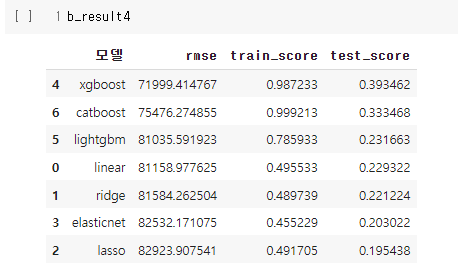

In [132]:
xgboost_result(b_DuckSooGung)

[04:54:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(75807.73650489782, 0.9882366048660283, 0.3276010294793472)

SeoDaeMunNaturalHistoryMuseum
--

In [ ]:
best_params(b_SeoDaeMunNaturalHistoryMuseum)

{'min_child_weight': 5, 'n_estimators': 100}

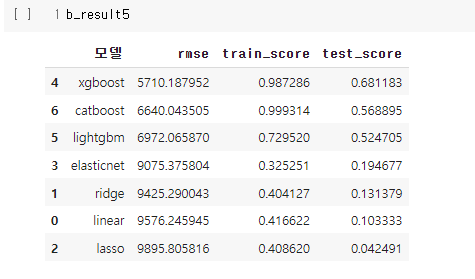

In [135]:
xgboost_result(b_SeoDaeMunNaturalHistoryMuseum)

[04:55:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(5917.68941224911, 0.9695781511898836, 0.6575910767326604)

SeoDaeMunPrisonHistoryMuseum
--

In [ ]:
best_params(b_SeoDaeMunPrisonHistoryMuseum)

{'bootstrap': False, 'learning_rate': 0.05, 'max_depth': 1, 'sub_sample': 0.5}

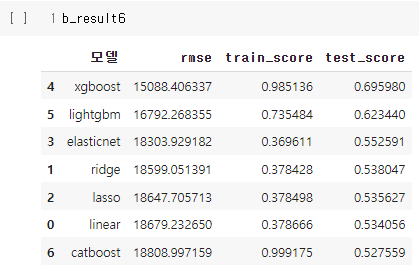

In [137]:
xgboost_result(b_SeoDaeMunPrisonHistoryMuseum)

[04:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(21507.627432630856, 0.5209535352625461, 0.38226667469976666)

SeoulMuseumOfArt
--

In [ ]:
best_params(b_SeoulMuseumOfArt)

{'bootstrap': False, 'learning_rate': 0.05, 'max_depth': 1, 'sub_sample': 0.5}

before:

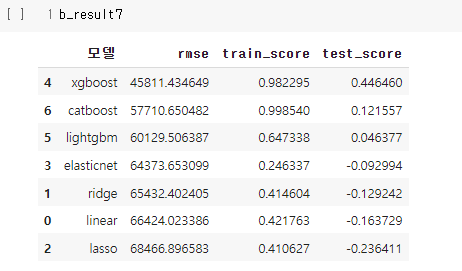


In [139]:
xgboost_result(b_SeoulMuseumOfArt)

[04:56:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(59900.855367648044, 0.5212264410537555, 0.05361573414441456)

SunReungJungReung
--

In [ ]:
best_params(b_SunReungJungReung)

{'colsample_bytree': 0.6}

before:

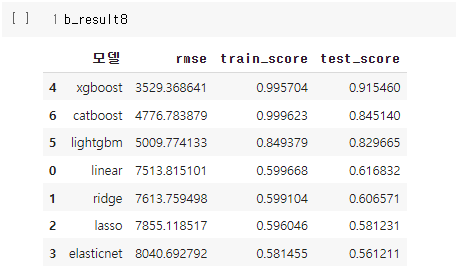

In [141]:
xgboost_result(b_SunReungJungReung)

[04:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3958.965055735601, 0.9949829399649505, 0.8936268751943053)

JongMyo
--

In [ ]:
best_params(b_JongMyo)

{'colsample_bytree': 0.7}

before:

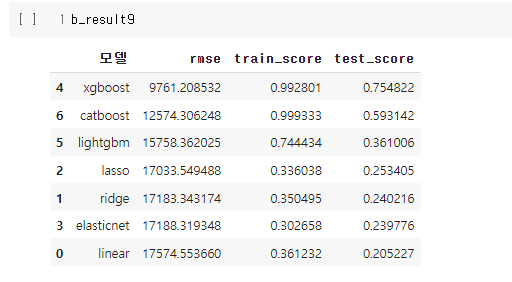

In [143]:
xgboost_result(b_JongMyo)

[04:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(11160.864295906435, 0.9930386391813512, 0.6794687948740816)

ChangGyeongGung
--

In [151]:
lgbm_best_params(b_ChangGyeongGung)

{'colsample_bytree': 0.6}

before:

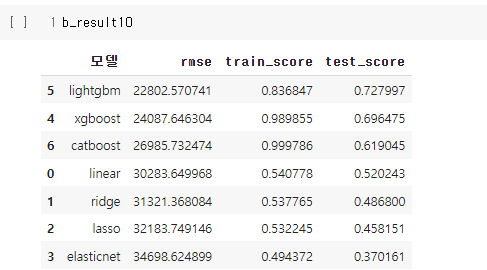

In [153]:
lgbm_result(b_ChangGyeongGung)

(22486.86740314782, 0.8254704352560016, 0.7354771234650149)

ChangDeokGung
--

In [ ]:
best_params(b_ChangDeokGung)

{'colsample_bytree': 0.9}

before:

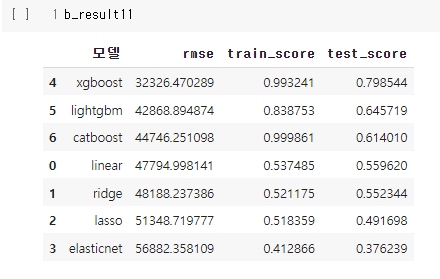

In [156]:
xgboost_result(b_ChangDeokGung)

[05:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(34466.310974673244, 0.9944885989423955, 0.7709911232195744)

TaeReungGangNeung
--